In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

In [6]:
#Obtained the csv files for the March Madness MVP info and the POTS info
tmvp_info = pd.read_csv("Downloads/MVP_info (2).csv")    #(86,17)
pots_info = pd.read_csv("Downloads/POTY_info.csv")   #(52,17)
print(tmvp_info.shape, " , " , pots_info.shape)
tmvp_info = tmvp_info.sort_values('Season', ascending = False)
tmvp_info = tmvp_info.reset_index()
#Because the POTS_info starts from season 1975, we will start  looking at from 1975 for both the data frames
start_tmvp_season = tmvp_info['Season'].min()  #1939
start_pots_info = pots_info['Season'].min()    #1975

#Finding and dropping every year below 1975
hold = tmvp_info.index[tmvp_info['Season'] == 1975] #49
tmvp_info.loc[hold]
tmvp_info = tmvp_info.drop(tmvp_info.index[50:])

#Renamed the Height in Inch into Height in Inches to match the column name of pots_info
tmvp_info.rename(columns = {"Height in Inch": "Height in Inches"}, inplace=  True)


(86, 17)  ,  (52, 17)


In [8]:
#Checking how many players won their respective awards for each data frames (tmvp and pots)
tmvp_info[tmvp_info['Players'] == 'Emeka Okafor']
player_count_tmvp = tmvp_info['Players'].value_counts()
player_count_pots = pots_info['Players'].value_counts()


#Using this same method but to check the positions of the players
position_counts_tmvp = tmvp_info['Position'].value_counts()
position_counts_pots = pots_info['Position'].value_counts()
#print("TMVP ",position_counts_tmvp.to_string() ,"\nPOTS", position_counts_pots.to_string())

#merging tmvp and pots info to gather all of the players (including dups)
frames = [tmvp_info, pots_info]
all_players = pd.concat(frames)
all_players['Height in Inches'] = all_players['Height in Inches'].astype(str)
all_players['Height in Inches']

#Noticed that there was 2 Small Forwards due to one having an extra whitespace at the end so I am getting rid of that
all_players['Position'] = all_players['Position'].astype(str)
all_players['Position'] = all_players['Position'].apply(lambda x: x.strip())
all_players['Position'].unique() #Fixed

#I also noticed that the year 2020, the covid year, will cause some errors and not necessary to my data, so I will find its index and get rid of it from the dataframe
hold = all_players['Players'].index[all_players['Players']  == 'COVID']
all_players = all_players.drop(hold)
all_players['Players'].unique()  #Fixed



array(['Tristen Newton', 'Adama Sanogo', 'Ochai Adbaji', 'Jared Butler',
       'Kyle Guy', 'Donte DiVincenzo', 'Joel Berry II',
       'Ryan Arcidiacono', 'Tyus Jones', 'Shabazz Napier', 'Luke Hancock',
       'Anthony Davis', 'Kemba Walker', 'Kyle Singler', 'Wayne Ellington',
       'Mario Chalmers', 'Corey Brewer', 'Joakim Noah', 'Sean May',
       'Emeka Okafor', 'Carmelo Anthony', 'Juan Dixon', 'Shane Battier',
       'Mateen Cleaves', 'Richard Hamilton', 'Jeff Sheppard',
       'Miles Simon', 'Tony Delk', "Ed O'Bannon", 'Corliss Williamson',
       'Donald Williams', 'Bobby Hurley', 'Christian Laettner',
       'Anderson Hunt', 'Glen Rice', 'Danny Manning', 'Keith Smart',
       'Pervis Ellison', 'Ed Pinckney', 'Patrick Ewing', 'Akeem Olajuwon',
       'James Worthy', 'Isiah Thomas', 'Darrell Griffith',
       'Magic Johnson', 'Jack Givens', 'Butch Lee', "Kent Benson'",
       'Richard Washington', 'Zach Edey', 'Oscar Tshiebwe', 'Luka Garza',
       'Zion Williamson', 'Jalen Brun

In [10]:
#Obtained the data sets for the statistics for each player recorded.
tmvp_season_stats = pd.read_csv('Downloads/tmvp_season_stats.csv')
pots_season_stats = pd.read_csv('Downloads/pots_season_stats.csv')

#Because pots is placed in descending order, we will do the same for the tmvp_season_stats
tmvp_season_stats = tmvp_season_stats.sort_values('Season', ascending=False)
tmvp_season_stats = tmvp_season_stats.reset_index(drop = True)

#Now we want to get rid of all rows below 1975 as pots_season_stats begin from 1975
tmvp_season_stats.loc[49]
tmvp_season_stats = tmvp_season_stats.drop(tmvp_season_stats.index[50:])

#Because the 'Season' column in tmvp_season_stats were floats, we changed it to object to match the dtype of the 'Season' column in pots_season_stats
tmvp_season_stats['Season'] = tmvp_season_stats['Season'].astype(int)
tmvp_season_stats['Season'] = tmvp_season_stats['Season'].astype(str)

In [14]:
#Merging both of the stats data frame into one for convenience, reorder and reindex
season_stats = pd.concat([tmvp_season_stats, pots_season_stats])
season_stats = season_stats.sort_values('Season', ascending = False)
season_stats = season_stats.reset_index(drop = True)

#The 3 point line was added to NCAA at the start of the 1986 but for the sake of this project, I replaced the NaN with 0 in the 3P%
season_stats['3P%'] = season_stats['3P%'].fillna(0)

#I also want to get rid of the COVID year for this dataframe as I did also for the all_players dataframe above.
hold = season_stats['Players'].index[season_stats['Players']  == 'COVID']
season_stats = season_stats.drop(hold)
print(season_stats['Players'].unique())  #Fixed


#grouping all of the data by positions and putting them in the same data frame
season_stats_group = season_stats.groupby('Position')
stats_pg = season_stats_group.get_group('Point Guard')
stats_sg = season_stats_group.get_group('Shooting Guard')
stats_pf = season_stats_group.get_group('Power Forward')
stats_sf = season_stats_group.get_group('Small Forward')
stats_f = season_stats_group.get_group('Forward')

stats_guard = pd.concat([stats_pg, stats_sg])
stats_center = season_stats_group.get_group('Center')
stats_forwards = pd.concat([stats_pf,stats_sf, stats_f])


['Tristen Newton' 'Zach Edey' 'Adama Sanogo' 'Oscar Tshiebwe'
 'Ochai Adbajii' 'Luka Garza' 'Jared Butler' 'Obi Toppin'
 'Zion Williamson' 'Kyle Guy' 'Jalen Brunson' 'Donte DiVincenzo'
 'Frank Mason' 'Joel Berry H' 'Denzel Valentine' 'Ryan Arcidiacano'
 'Tyus Jones' 'Frank Kaminsky' 'Doug McDermott' 'Shabazz Napier'
 'Luke Hancock' 'Trey Burke' 'Draymond Green' 'Anthony Davis'
 'Jimmer Fredette' 'Kemba Walker' 'Kyle Singer' 'Evan Turner'
 'Blake Griffin' 'Wayne Ellington' 'Mario Chalmers' 'Tyler Hansbrough'
 'Kevin Durant' 'Corey Brewer' 'J.J. Redick' 'Joakim Noah' 'Sean May'
 'Andrew Bogut' 'Emeka Okafor' 'Jameer Nelson' 'Carmelo Anthony'
 'Nick Collison' 'Drew Gooden' 'Jay Williams' 'Juan Dixon' 'Shane Battier'
 'Kenyon Martin' 'Mateen Cleaves' 'Elton Brand' 'Richard Hamilton'
 'Antawn Jamison' 'Jeff Sheppard' 'Miles Simon' 'Tim Duncan'
 'Marcus Camby' 'Tony Delk' 'Shawn Respert' "Ed O'Bannon" 'Glenn Robinson'
 'Corliss Williamson' 'Calbert Cheaney' 'Donald Williams'
 'Christian Laet

In [16]:
#The important 2 data frames for final comparison is
#     all_players     (Contains all info for the players)
#     season_stats    (Contains all season stats for the players)

#reordering and reindexing the same way as for season_stats
all_players = all_players.sort_values('Season', ascending = False)
all_players = all_players.reset_index(drop=True)

#Now I want to organize all_players by positions also
all_players_info = all_players.groupby('Position')
players_pg = all_players_info.get_group('Point Guard')
players_pg = players_pg.reset_index()
players_sg = all_players_info.get_group('Shooting Guard')
players_sg = players_sg.reset_index()
players_pf = all_players_info.get_group('Power Forward')
players_pf = players_pf.reset_index()
players_sf = all_players_info.get_group('Small Forward')
players_sf = players_sf.reset_index()
players_f = all_players_info.get_group('Forward')
players_f = players_f.reset_index()

players_guard = pd.concat([players_pg, players_sg])
players_guard = players_guard.reset_index(drop = True)
players_center = all_players_info.get_group('Center')
players_center = players_center.reset_index()
players_forwards = pd.concat([players_pf,players_sf, players_f])
players_forwards = players_forwards.reset_index(drop = True)


#Now my data is ready to use

<Axes: ylabel='count'>

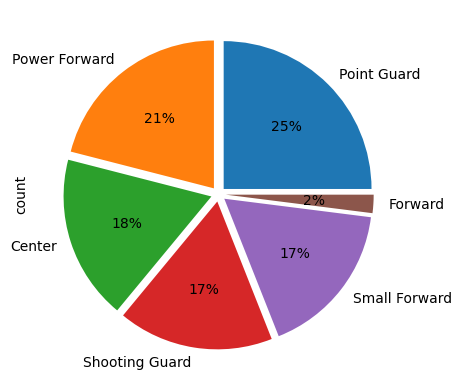

In [18]:
#Thesis: Guards vs Centers?
# Check which position won most of these 2 accolades from 1975 to current?
all_players['Position'].unique()
all_players['Position'].value_counts(dropna = True).plot(kind = "pie", autopct = '%1.0f%%', explode =(0.05,0.05,0.05,0.05,0.05,0.05))

#This charts shows us that the most 'winning' position was not Centers but rather Point Guards and Power Forwards

<Axes: title={'center': 'Percentage of Positions'}, ylabel='count'>

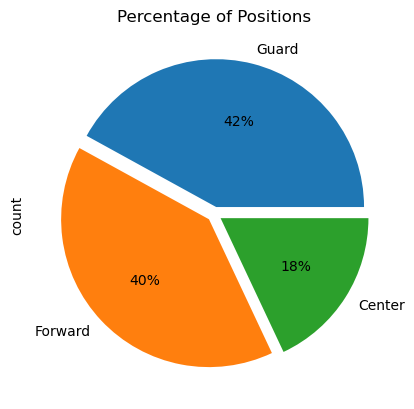

In [20]:
#I want to create a list that'll count all positions into specific groups (i.e PG & SG => Guard... etc.)
data = []
for pos in all_players['Position']:
        if (pos == 'Shooting Guard' or pos == 'Point Guard'):
            data.insert(1, 'Guard')
        elif (pos == 'Forward' or pos == 'Power Forward' or pos == 'Small Forward'):
            data.insert(1, 'Forward')
        else:
            data.insert(1, 'Center')
#Now I'll recreate a pie graph but for a more general outlook
data = pd.DataFrame(data, columns= ['Position'])
data['Position'].value_counts()
data['Position'].value_counts(dropna = True).plot(kind = "pie", autopct = '%1.0f%%', explode =(0.05,0.05,0.05), title = 'Percentage of Positions')

# We can see that contrary to my beliefs prior to this study, Center position was least 'winning' position 
# and Guard position was first while Forward was a close second

# Then this becomes not a Center vs Guard, but rather a Guard vs Forward debate.

[Text(1, 0, 'Center'),
 Text(2, 0, 'Forward'),
 Text(3, 0, 'Point Guard'),
 Text(4, 0, 'Power Forward'),
 Text(5, 0, 'Shooting Guard'),
 Text(6, 0, 'Small Forward')]

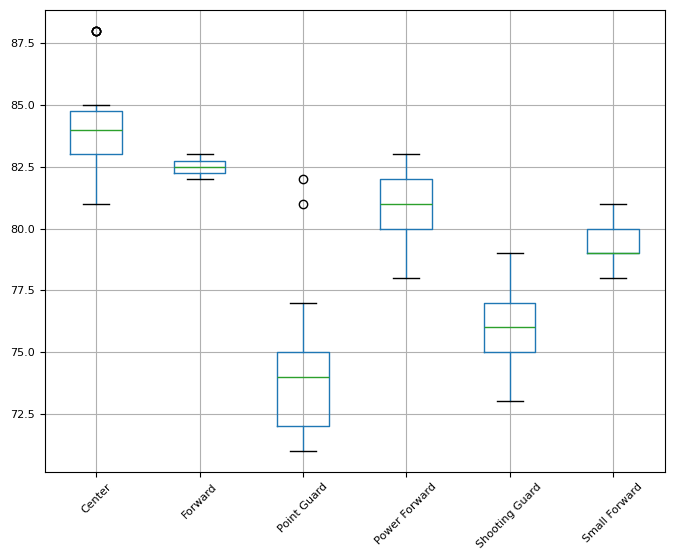

In [22]:
#Another that could be relevant to this Positional debate is the type of offense they carry out
# Do they shoot more 3's or do they prefer more efficient shooters and size

#First, I'm going to do a size comparison for each position
players_guard['Height in Inches'] = players_guard['Height in Inches'].astype(int)
all_players['Height in Inches'] = all_players['Height in Inches'].astype(int)






fig = plt.figure(figsize=(8,6))
ax = fig.gca()
all_players_info.boxplot(subplots = False, column = 'Height in Inches', rot = 45, fontsize = 8).set_xticklabels( 
    ('Center', 'Forward','Point Guard', 'Power Forward', 'Shooting Guard', 'Small Forward') )


C:\Users\yosup\AppData\Local\Temp\ipykernel_26912\427996149.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  holding = holding.replace({'Power Forward':'Forward', 'Small Forward':'Forward'})


Text(0, 0.5, 'Height in Inches')

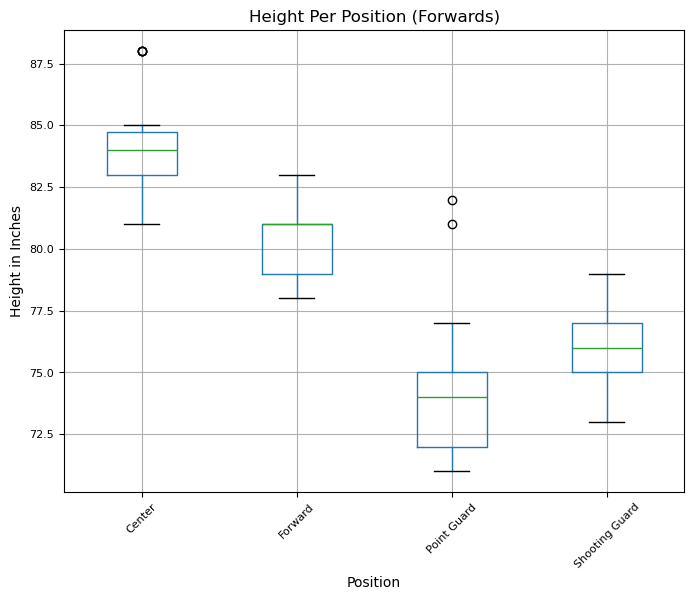

In [24]:
#Because 'Forward' can mean both Small and Power Forward, we combined all 3 into 1 group called Forward

holding = all_players
holding = holding.replace({'Power Forward':'Forward', 'Small Forward':'Forward'})
holding = holding.groupby('Position')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
holding.boxplot(subplots = False, column = 'Height in Inches', rot = 45, fontsize = 8).set_xticklabels( ('Center', 'Forward', 'Point Guard', 'Shooting Guard') )
ax.set_title('Height Per Position (Forwards)')
ax.set_xlabel('Position')
ax.set_ylabel('Height in Inches')

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

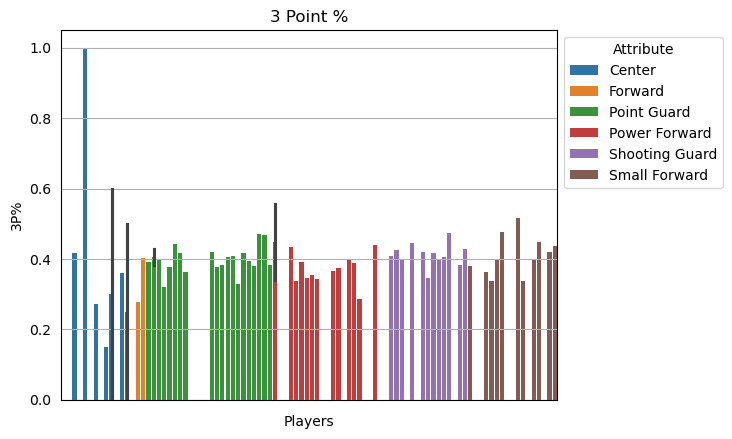

In [106]:
#Now I want to compare the 3P% per Position
season_stats['Position'] = season_stats['Position'].astype(str)
season_stats['Position'] = season_stats['Position'].apply(lambda x: x.strip())
season_stats['Position'].unique()
df = season_stats[['Position','3P%','Players']]
df.replace('Small Forward', 'Forward')

df = df.sort_values('Position')
ax = sns.barplot(data=df, x='Players', y='3P%', hue='Position', orient='v')
ax.set(xlabel='Players', title='3 Point %')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

In [36]:
#Number statistics for 3P%
guard_3p = stats_guard['3P%'].mean()*100

forward_3p = stats_forwards['3P%'].mean()*100
center_3p = stats_center['3P%'].mean()*100
print('Mean Guard 3P%: ', guard_3p, '\nMean Forward 3P%: ', forward_3p, '\nMean Center 3P%: ', center_3p)

Mean Guard 3P%:  31.67142857142857 
Mean Forward 3P%:  27.206451612903233 
Mean Center 3P%:  18.327777777777776


C:\Users\yosup\AppData\Local\Temp\ipykernel_26912\3663759480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = df['Position'].replace('Small Forward','Forward')
C:\Users\yosup\AppData\Local\Temp\ipykernel_26912\3663759480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = df['Position'].replace('Power Forward', 'Forward')


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

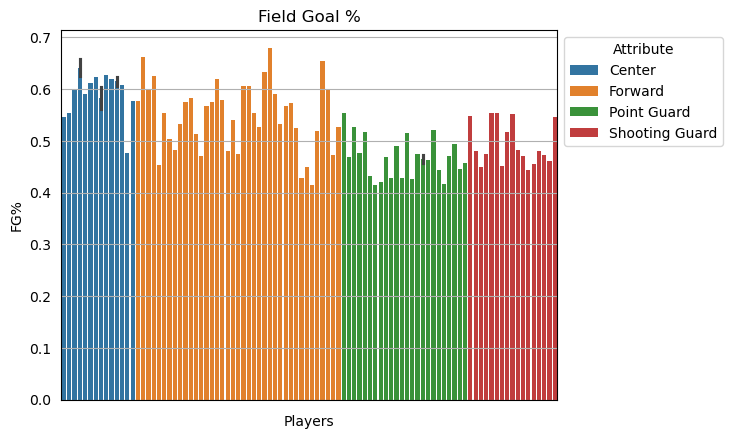

In [102]:
season_stats['Position'] = season_stats['Position'].astype(str)
season_stats['Position'] = season_stats['Position'].apply(lambda x: x.strip())
season_stats['Position'].unique()
df = season_stats[['Position','FG%','Players']]


df['Position'] = df['Position'].replace('Small Forward','Forward')
df['Position'] = df['Position'].replace('Power Forward', 'Forward')
df = df.sort_values('Position')
ax = sns.barplot(data=df, x='Players', y='FG%', hue='Position', orient='v')
ax.set(xlabel='Players', title='Field Goal %')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

In [ ]:
# As expected, the centers and forwards had most of the highest FG% while most Guards had a lower FG%
# Therefore, this shows that the guards that did win, it was not their out of ordinary efficient scoring that made them stand out.

C:\Users\yosup\AppData\Local\Temp\ipykernel_38368\3113035411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = df['Position'].replace('Small Forward', 'Forward')
C:\Users\yosup\AppData\Local\Temp\ipykernel_38368\3113035411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'] = df['Position'].replace('Power Forward', 'Forward')


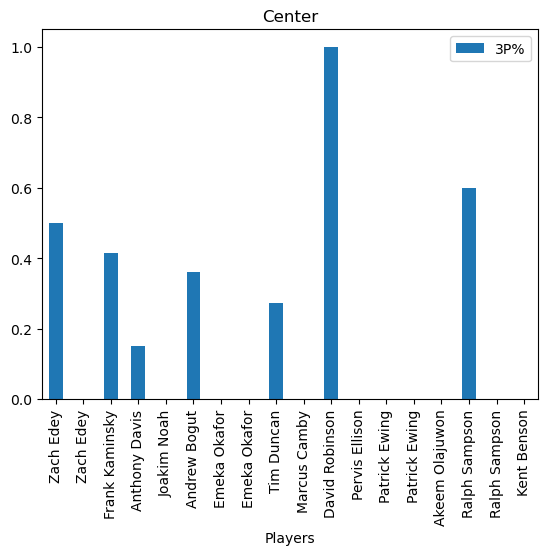

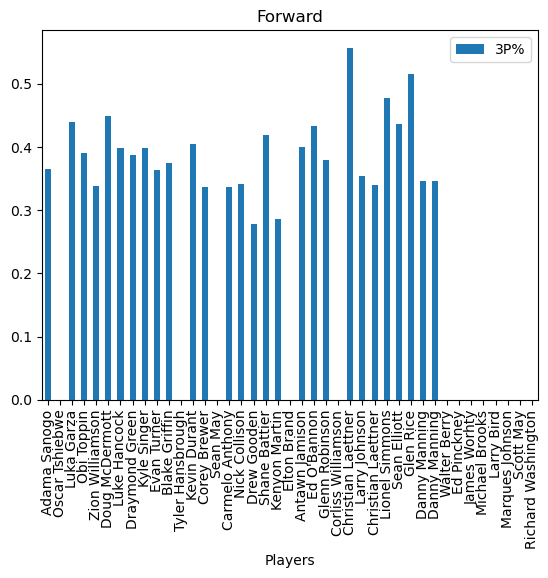

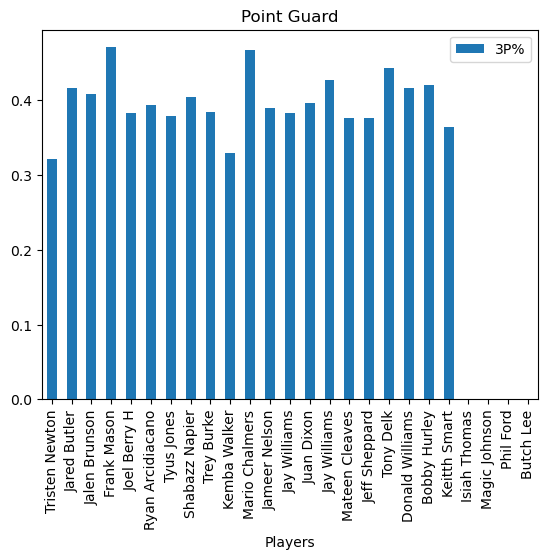

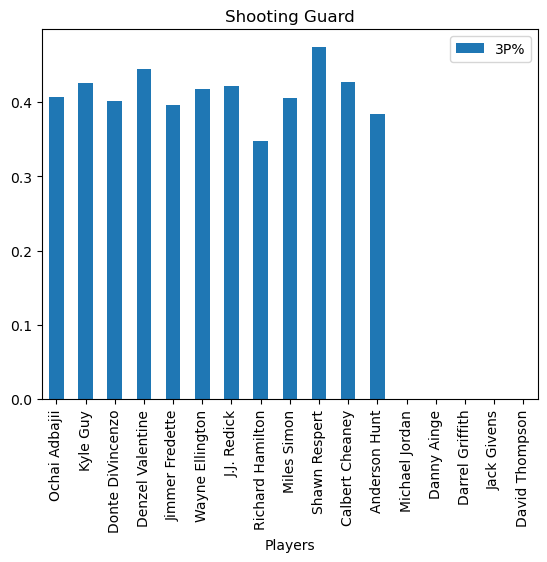

In [39]:
df = season_stats[['Position','3P%','Players']]
df['Position'] = df['Position'].replace('Small Forward', 'Forward')
df['Position'] = df['Position'].replace('Power Forward', 'Forward')

ax = df.groupby('Position').plot.bar(x = 'Players', y = '3P%', subplots = True, rot = 90)
titles = ['Center', 'Forward', 'Point Guard', 'Shooting Guard']
for i, subplot in enumerate(ax):
    for j, axis in enumerate(subplot):
        axis.set_title(titles[i * len(subplot)+j])

In [ ]:
#I lost a lot of my progess after this so now I will have to redo most of the stuff.


# Up until the previous point, I had analyzed data about the number of Positions that won the awards, compared their FG% and 3P%.
# Now I want to compare their other statistics.
# We already found out that it was not in fact a battle of Guards vs Centers, but rather a battle of Guards vs Forwards.

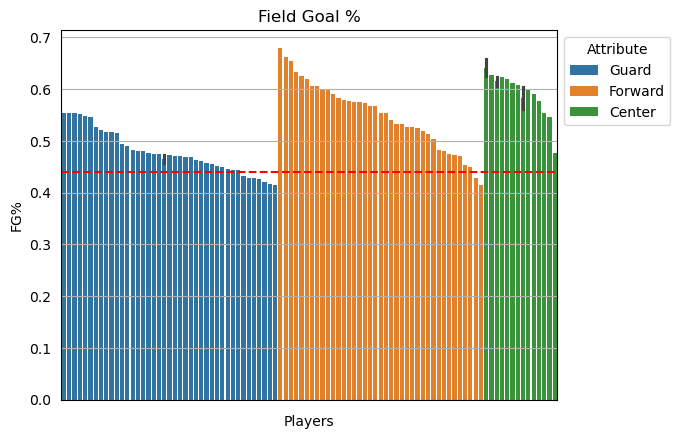

In [130]:
# To simplify this analysis, I want to make this a comparison of Forwards, Centers and Guards.
# Therefore I will create a new dataframe that will sort the positions into Forwards, Guards, and Centers
season_stats_simplified = season_stats
season_stats_simplified['Position'] = season_stats_simplified['Position'].replace('Point Guard','Guard')
season_stats_simplified['Position'] = season_stats_simplified['Position'].replace('Shooting Guard','Guard')
season_stats_simplified['Position'] = season_stats_simplified['Position'].replace('Power Forward','Forward')
season_stats_simplified['Position'] = season_stats_simplified['Position'].replace('Small Forward','Forward')
season_stats_simplified['Position'].unique()

# Now I'm going to compare the stats again.
df = season_stats_simplified.sort_values(['Position','FG%'], ascending = [False, False])
df['FG%'] = df['FG%'].dropna() 
# Dropped NaN values
ax = sns.barplot(data=df, x='Players', y='FG%', hue='Position', orient='v')
ax.set(xlabel='Players', title='Field Goal %')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

average_value = 0.44  # This is the NCAA average FG% since 1975
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')

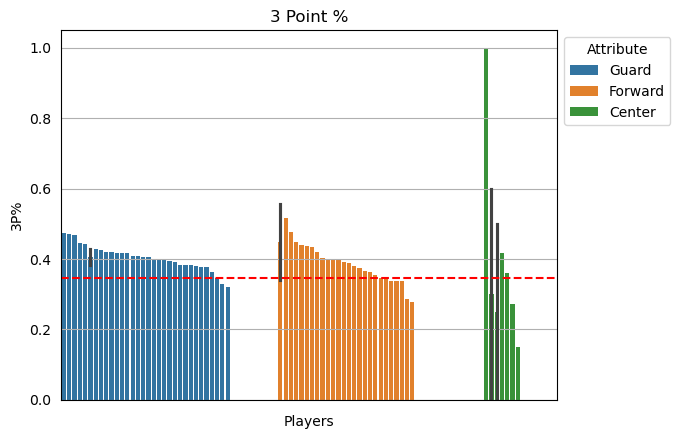

In [128]:
# Now the same for 3P%
df = season_stats_simplified.sort_values(['Position','3P%'], ascending = [False, False])
df['3P%'] = df['3P%'].dropna()
# Dropped NaN values as it means that they either didn't shoot 3's at all or was simply 
ax = sns.barplot(data=df, x='Players', y='3P%', hue='Position', orient='v')
ax.set(xlabel='Players', title='3 Point %')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

# We have to take into account that Centers do not shoot as many 3's compared to Guards and Forwards, hence a more extreme percentage is to be expected.
average_value = 0.345  # This is the NCAA average 3P% historically
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')


In [73]:
# Prepare the all_players dataframe the same way as season_stats
all_players_simplified = all_players
all_players_simplified['Position'] = all_players_simplified['Position'].replace('Point Guard','Guard')
all_players_simplified['Position'] = all_players_simplified['Position'].replace('Shooting Guard','Guard')
all_players_simplified['Position'] = all_players_simplified['Position'].replace('Power Forward','Forward')
all_players_simplified['Position'] = all_players_simplified['Position'].replace('Small Forward','Forward')
all_players_simplified['Position'].unique()

array(['Guard', 'Center', 'Forward'], dtype=object)

Text(0, 0.5, 'Height in Inches')

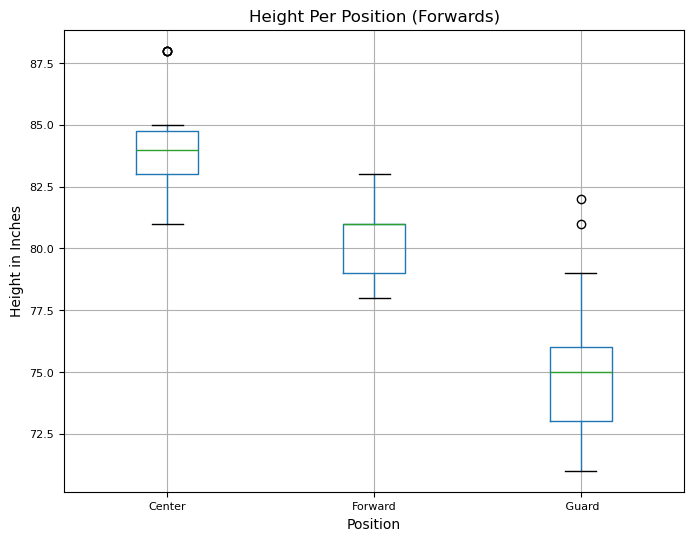

In [77]:
# Now recompare their height distribution
holding = all_players_simplified.groupby('Position')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
holding.boxplot(subplots = False, column = 'Height in Inches', rot = 0, fontsize = 8).set_xticklabels( ('Center', 'Forward',' Guard') )
ax.set_title('Height Per Position (Forwards)')
ax.set_xlabel('Position')
ax.set_ylabel('Height in Inches')

# The Height distribution is as expected, Center -> Forward -> Guard for the ascending list.
# This shows that the guards that won were not significantly taller either

In [122]:
# Now I want to compare another statistics, 
# For this, I want to bring another statistics, that was not included in the original DataSet : Assists
# Assists is and playmaking is a crucial part to Guards and may have been hat set them aprart from other players for their respective season.

assists = pd.read_csv('Downloads/assist_csv.csv')
assists['Position'] = assists['Position'].astype(str)
assists['Position'] = assists['Position'].apply(lambda x: x.strip())
assists['Position'] = assists['Position'].replace('Small Forward','Forward')
assists['Position'] = assists['Position'].replace('Power Forward','Forward')
assists['Position'] = assists['Position'].replace('Point Guard','Guard')
assists['Position'] = assists['Position'].replace('Shooting Guard','Guard')
assists['Position'].unique()
assists.rename(columns = {'PLAYERS':'Players'}, inplace = True)
assists_simp = pd.merge(season_stats_simplified, assists, on=['Players', 'Class'], how='inner')
assists_simp.rename(columns = {'Season_x':'Season', 'Position_x':'Position'}, inplace = True)
assists_simp.drop(columns = ['Season_y', 'Position_y'], inplace = True)

,Players,Season,Class,Position,Position 2,G,3P%,FT%,FG%,STL,TRB,BLK,PTS
0,Tristen Newton,2024,4.0,Guard,Shooting Guard,40.0,0.321,0.808,0.415,0.9,6.6,0.3,15.1
1,Zach Edey,2024,4.0,Center,NaN,39.0,0.500,0.711,0.623,0.3,12.2,2.2,25.2
2,Adama Sanogo,2023,3.0,Forward,NaN,39.0,0.365,0.766,0.606,0.7,7.7,0.8,17.2
3,Zach Edey,2023,3.0,Center,NaN,34.0,0.000,0.734,0.607,0.2,12.9,2.1,22.3
4,Oscar Tshiebwe,2022,3.0,Forward,Center,34.0,0.000,0.691,0.606,1.8,15.1,1.6,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Marques Johnson,1977,4.0,Forward,Shooting Guard,27.0,0.000,0.621,0.591,NaN,11.1,NaN,21.4
98,Scott May,1976,4.0,Forward,NaN,32.0,0.000,0.782,0.527,NaN,7.7,NaN,23.5
99,Kent Benson,1976,3.0,Center,NaN,32.0,0.000,0.684,0.578,NaN,8.8,NaN,17.3
100,Richard Washington,1975,2.0,Forward,Center,31.0,0.000,0.724,0.576,NaN,7.8,NaN,15.9


PTS
False    86
True     17
Name: count, dtype: int64


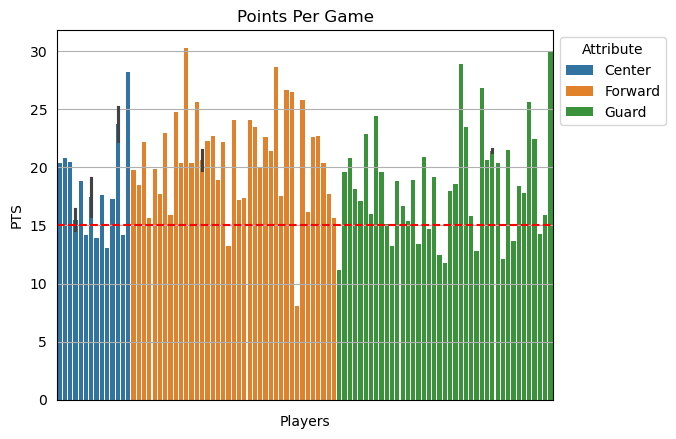

In [190]:
# I want to compare their scoring
df = assists_simp

df = df.sort_values(['Position'])
ax = sns.barplot(data=df, x='Players', y='PTS', hue='Position', orient='v')
ax.set(xlabel='Players', title='Points Per Game')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

average_value = 15  # This is the NCAA average PPG since 1975
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')

hold = (df['PTS'] <= average_value)
print(hold.value_counts())
# Only 17/103 had below the league average assists per game out of the ones that one

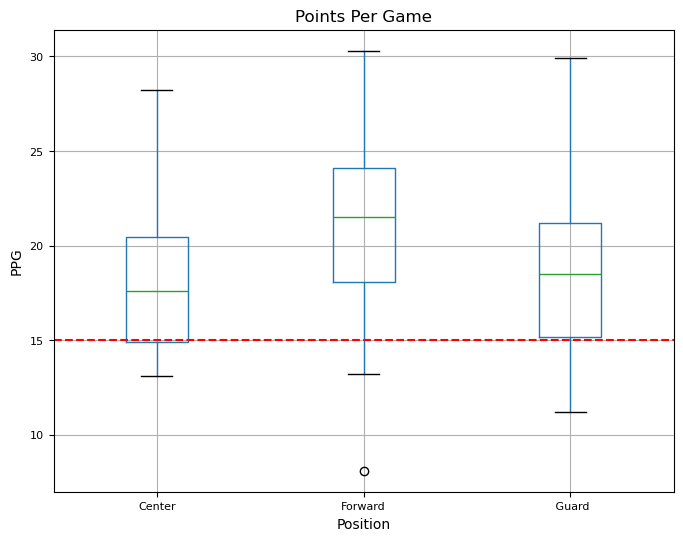

In [158]:
# The same but in Boxplots (points)
holding = assists_simp.groupby('Position')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
holding.boxplot(subplots = False, column = 'PTS', rot = 0, fontsize = 8).set_xticklabels( ('Center', 'Forward',' Guard') )
ax.set_title('Points Per Game')
ax.set_xlabel('Position')
ax.set_ylabel('PPG')

average_value = 15  # This is the NCAA average PPG since 1975
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')

AST
True     77
False    26
Name: count, dtype: int64


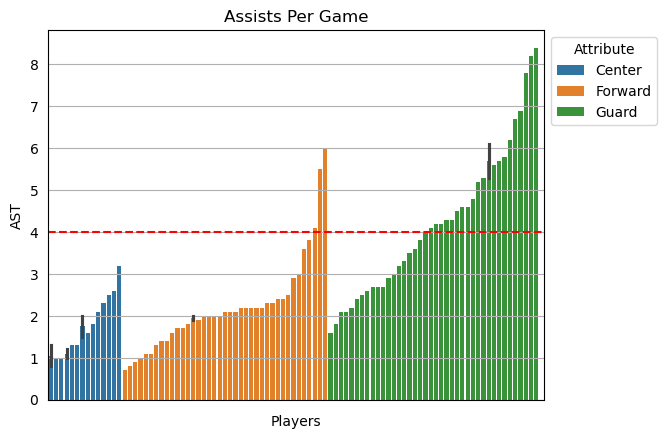

In [188]:
df = df.sort_values(['Position', 'AST'])
ax = sns.barplot(data=df, x='Players', y='AST', hue='Position', orient='v')
ax.set(xlabel='Players', title='Assists Per Game')
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(axis='y')
ax.tick_params(left=False, bottom=False)
plt.gca().set_xticklabels([])

average_value = 4  # This is the NCAA average PPG since 1975
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')

hold = (df['AST'] <= average_value)
print(hold.value_counts())
# Only 26/103 had above the league average assists per game out of the ones that one

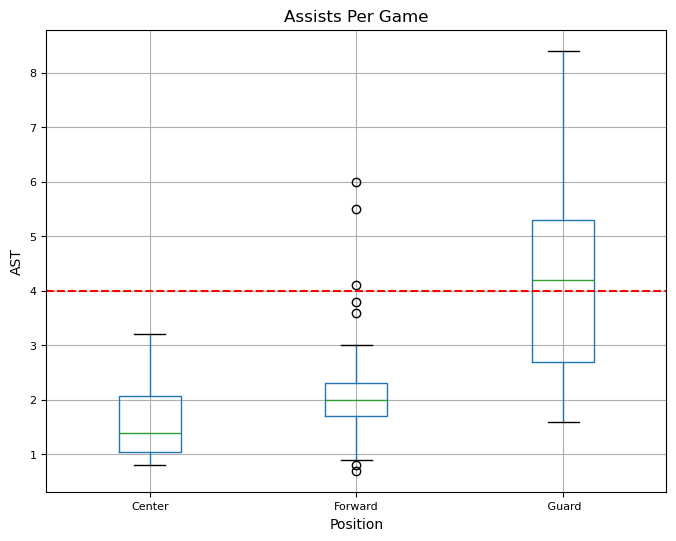

In [156]:
#The same but in Boxplots (assists)
holding = assists_simp.groupby('Position')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
holding.boxplot(subplots = False, column = 'AST', rot = 0, fontsize = 8).set_xticklabels( ('Center', 'Forward',' Guard') )
ax.set_title('Assists Per Game')
ax.set_xlabel('Position')
ax.set_ylabel('AST')
average_value = 4  # This is the NCAA average APG since 1975
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')

In [238]:
def normalize (df):
    df = df.dropna()
    mini = min(df)
    maxi = max(df)
    return [((x - mini)/(maxi-mini))*(6) for x in df]

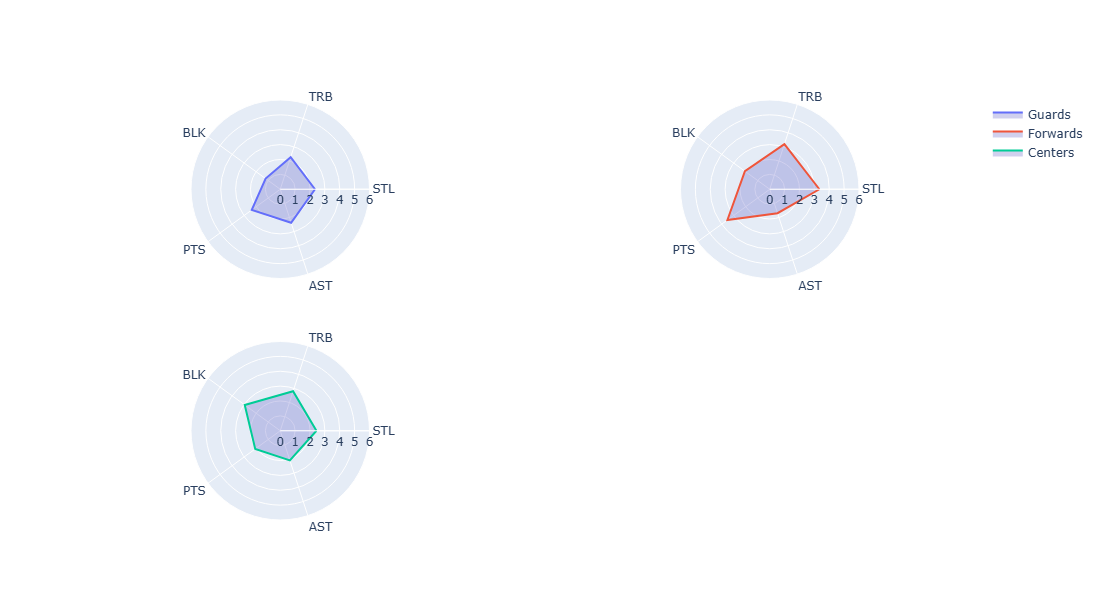

In [418]:
df = assists_simp.groupby('Position')
guards = df.get_group('Guard')
forwards = df.get_group('Forward')
center = df.get_group('Center')

g_p = pd.DataFrame({ 'Col A' : ['STL', 'TRB', 'BLK', 'PTS', 'AST'],
    'Col B': [np.mean(normalize(guards['STL'])), np.mean(normalize(guards['TRB'])), np.mean(normalize(guards['BLK'])), np.mean(normalize(guards['PTS'])), np.mean(normalize(guards['AST']))],
    'Col C': 'Guards'
})
f_p = pd.DataFrame({ 'Col A' : ['STL', 'TRB', 'BLK', 'PTS', 'AST'],
    'Col B': [np.mean(normalize(forwards['STL'])), np.mean(normalize(forwards['TRB'])), np.mean(normalize(forwards['BLK'])), np.mean(normalize(forwards['PTS'])), np.mean(normalize(forwards['AST']))],
    'Col C': 'Forwards'
})
c_p = pd.DataFrame({ 'Col A' : ['STL', 'TRB', 'BLK', 'PTS', 'AST'],
    'Col B': [np.mean(normalize(center['STL'])), np.mean(normalize(center['TRB'])), np.mean(normalize(center['BLK'])), np.mean(normalize(center['PTS'])), np.mean(normalize(center['AST']))],
    'Col C': 'Center'
})
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

# Add trace for the first DataFrame
fig.add_trace(go.Scatterpolar(
    r=closed_g['Col B'],
    theta=closed_g['Col A'],
    mode='lines',
    name='Guards',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
), 1,1)

# Add trace for the second DataFrame
fig.add_trace(go.Scatterpolar(
    r=closed_f['Col B'],
    theta=closed_f['Col A'],
    mode='lines',
    name='Forwards',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
), 1,2)

fig.add_trace(go.Scatterpolar(
    r=closed_c['Col B'],
    theta=closed_c['Col A'],
    mode='lines',
    name='Centers',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
), 2,1)

fig.update_traces(fill='toself')
fig.update_layout(
    width = 600,
    height= 600,
    polar=dict(
        radialaxis=dict(
            range=[0, 6]  # Set the desired range for the radial axis
        )
    ),
    polar2=dict(
        radialaxis=dict(
            range=[0, 6]  # Set the desired range for the radial axis
        )
    ),
    polar3=dict(
        radialaxis=dict(
            range=[0, 6]  # Set the desired range for the radial axis
        )
    )
)

fig.show()

In [278]:
def close_loop(df):
    # Append the first point to the end of the DataFrame to close the loop
    return pd.concat([df, df.iloc[[0]]], ignore_index=True)

  Col A  Col B     Col C
0   STL   2.34    Guards
1   TRB   2.27    Guards
2   BLK   1.22    Guards
3   PTS   2.37    Guards
4   AST   2.37    Guards
0   STL   3.34  Forwards
1   TRB   3.19  Forwards
2   BLK   2.06  Forwards
3   PTS   3.52  Forwards
4   AST   1.69  Forwards
0   STL   2.43    Center
1   TRB   2.79    Center
2   BLK   2.95    Center
3   PTS   2.08    Center
4   AST   2.10    Center


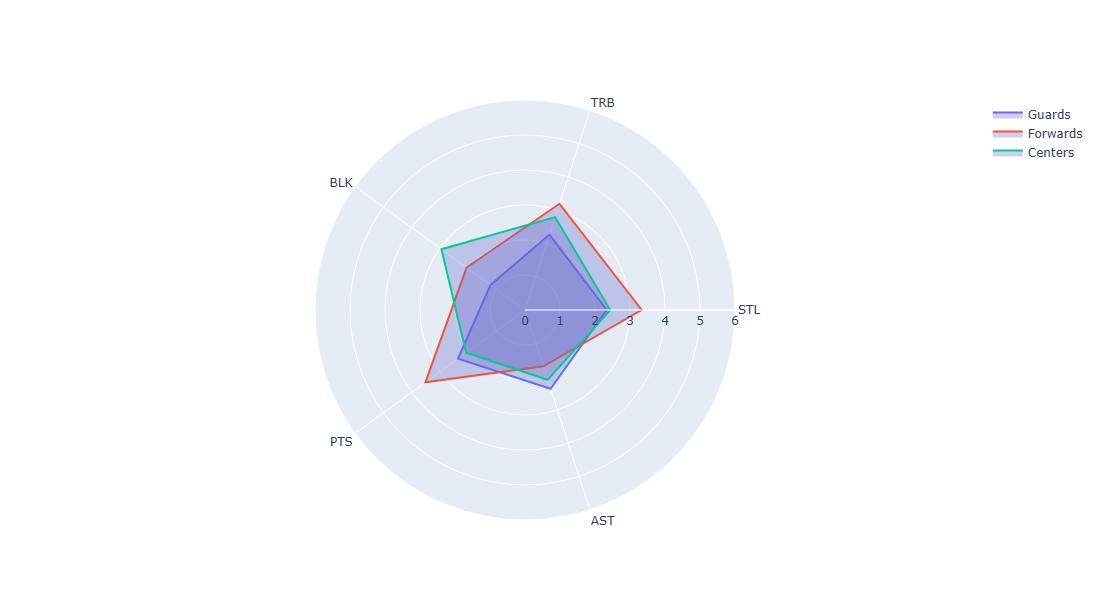

In [386]:
closed_g = close_loop(g_p)
closed_f = close_loop(f_p)
closed_c = close_loop(c_p)
concatted = pd.concat([g_p, f_p, c_p])
concatted = concatted.round(2)
print(concatted)

t1 = time.time()

# Create the polar plot with multiple traces
fig = go.Figure()

# Add trace for the first DataFrame
fig.add_trace(go.Scatterpolar(
    r=closed_g['Col B'],
    theta=closed_g['Col A'],
    mode='lines',
    name='Guards',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
))

# Add trace for the second DataFrame
fig.add_trace(go.Scatterpolar(
    r=closed_f['Col B'],
    theta=closed_f['Col A'],
    mode='lines',
    name='Forwards',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
))

fig.add_trace(go.Scatterpolar(
    r=closed_c['Col B'],
    theta=closed_c['Col A'],
    mode='lines',
    name='Centers',
    fill='toself',  # Fill area under the curve
    fillcolor='rgba(100, 100, 200, 0.3)'
))

# Update the layout to set the radial axis range
fig.update_layout(
    width = 600,
    height= 600,
    polar=dict(
        radialaxis=dict(
            range=[0, 6]  # Set the desired range for the radial axis
        )
    ))

